In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder # formating data categorical to numerical
# import all classification algorithm to choose best performing model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import  SVC
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# Project Name :- Fraud Loan Prediction
- A financial company wants to automate the loan eligibility process based on customer detail provided by filing application     form.
- The Main Objective of thios ptroject is to predict Whether to give loan to a person or not based on the information.

## The information of Applicant is given below :-

- Input Varible Descriptions:-

- 1.Loan_ID    :-     Unique Loan ID
- 2.Gender     :-     Male / Female
- 3.Married    :-     Applicant married(Y/N)
- 4.Dependents :-  Number of dependents
- 5.Education  :-  Graduate/Under Graduate
- 6.Self_Employed :- Self emplyed(Y/N)
- 7.Income        :- Applicant Income
- 8.Coapplicant Income
- 9.Loan Amount:- Loan Amount in Thousands
- 10.Loan_Amount_Term :- Term of Loan in Months
- 11.Credit History   :- Credit Histiory Meets Guidelines
- 12.Property_Area    :- Urban/Semi Urban/Rural


- Output Variable Description :-

- 13. Loan_Status :- Loan Approved(Y/N)

## Step 1: Exploratory data analysis (EDA)
- read & preview the dataset
- variable identification # looking the input data # what will be the output variable
- univariate analysis - tacking small small variable and plot bar chart and finding histogram
- Bivariate analysis - tacking two column or two variable and looking the relationship between the,and also find correlation     and covariance within two variable
- handling and removing null values- missing data
- Handling Categorical Variabl
- finding and removing outliers

In [2]:
# Loading the dataset.
Loan = pd.read_csv('Loan_prediction.csv')

In [3]:
# preview the dataset
Loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# let's check the datatypes of all feature which present in dataset

Loan.dtypes

# its show we have all features float64 and object except ApplicantIncome in the dataset.

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
#Information about the data columns
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# now check feature name presence in the dataset

Loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
type(Loan)

pandas.core.frame.DataFrame

In [8]:
# let's finding null and nan values whether it is available in Loan dataset or not.

print('total number of null values:\n',Loan.isnull().sum())
print('\n')
print('total number of Nan values:\n',Loan.isna().sum())


total number of null values:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


total number of Nan values:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


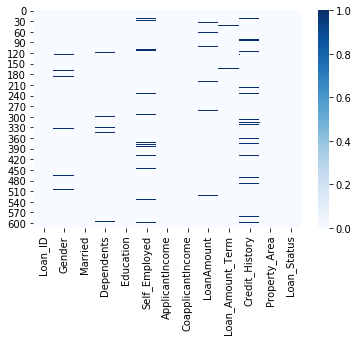

In [9]:
# let's visualize null values using heatmap

sns.heatmap(Loan.isnull(),cmap='Blues')

# from the below heatmap we can say that missing values is present in most of the each columns


In [10]:
# univariate analysis of Numerical  variables using a describe() function
# describe function provide  statistics summary of continuous variable.

Loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
# now we check how many categories are available in to Loan_status feture in Loan dataset
Loan['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [12]:
# let's check unique values and their frequency of varible Property_Area

Loan['Property_Area'].value_counts()

# most of applicants are belong from semiurban area followed by urban.

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [13]:
# let's check unique values and their frequency of varible Married in the dataset

Loan['Married'].value_counts()

# most of applicants are married followed by unmarried

Yes    398
No     213
Name: Married, dtype: int64

In [14]:
# let's check how many unique value presence in each dataset

col= Loan.columns.values
col

list((columns,np.unique(Loan[columns].astype(str)).size) for columns in col)


[('Loan_ID', 614),
 ('Gender', 3),
 ('Married', 3),
 ('Dependents', 5),
 ('Education', 2),
 ('Self_Employed', 3),
 ('ApplicantIncome', 505),
 ('CoapplicantIncome', 287),
 ('LoanAmount', 204),
 ('Loan_Amount_Term', 11),
 ('Credit_History', 3),
 ('Property_Area', 3),
 ('Loan_Status', 2)]

# Key Observation :-
- The Loan dataset has 614 rows with 13 features.
- in which Loan_Status feature name is our dependent variable.
- the heatmap and data information confirms , their is  missing and Nan values in almost each columns so we need work on these.
- we seen above at Loan_Status Feature, we notice that only 192 applicants out of 614 are not eligible for loan based on -       independent features.

# statistic summary observations :- 
1. the mean is more than median(50th percentile) in the Applicant Income,Loan Amount and coapplicantincome columns.
2. there is a large difference in 75th --  - percentile and max in the ApplicantIncome	CoapplicantIncome	LoanAmount	          Loan_Amount_Term .
4. the 1 and 2 observation suggest that there is extream outlier present in these three columns.

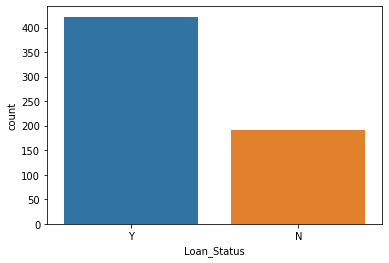

In [15]:
# Let's do some plotting to know how the data columns are distributed in the  dataset¶
# univariate data analysis by graphical representation.
# firstly we will plotting Loan_status feture with help of counplot to understand whether it's balanced or imblanced data

sns.countplot(x='Loan_Status',data=Loan)

# based on below graph we say that output label has imblanceb data because 422 no.of Loan were Approved out of 613.

ApplicantIncome         AxesSubplot(0.125,0.125;0.133621x0.755)
CoapplicantIncome    AxesSubplot(0.285345,0.125;0.133621x0.755)
LoanAmount            AxesSubplot(0.44569,0.125;0.133621x0.755)
Loan_Amount_Term     AxesSubplot(0.606034,0.125;0.133621x0.755)
Credit_History       AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

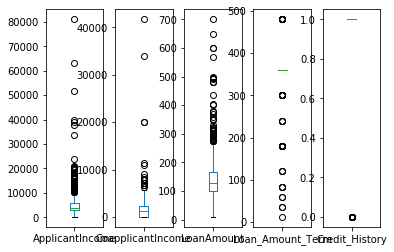

In [16]:
# let's plot Box Plot for understanding the distribution and observe the presence of outliers.

Loan.plot(kind='box',subplots=True,layout=(1,5))

# The below Boxplot Confirms the presence of extrem outliers in the following columns.

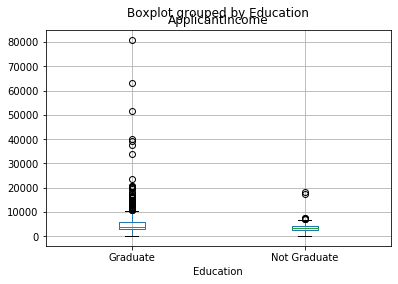

In [17]:

# let's plot boxplot for varible Applicant Income against Education feature.

Loan.boxplot(column='ApplicantIncome', by='Education')

# from the below boxplot we can that there are higher number of Graduates with very high income 
# which are show presence of outliers in applicant income columns

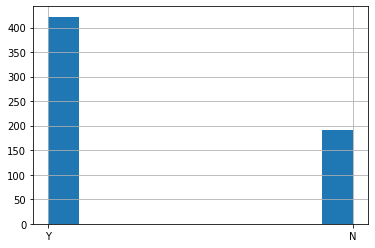

In [18]:
# let's check distribution of Loan_Status using hist map
Loan['Loan_Status'].hist()

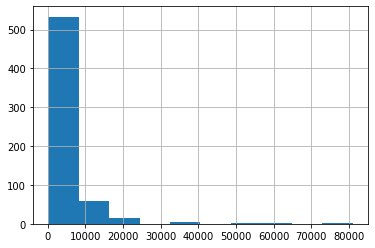

In [19]:
# let's check distribution of Loan_Status using hist map
Loan['ApplicantIncome'].hist()

# as we see its is highly skewed right skewed data 

In [20]:
#lets check the skewness of the dataset using skew function
Loan.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [21]:
# let's fill missing values first using mean,median and mode method 

# now we fill missing values with   most frequent values in Gender,Married and self-employed feature using SimpleImputer method

from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy='most_frequent')
Loan['Gender']=imp.fit_transform(Loan['Gender'].values.reshape(-1,1))
Loan['Married']=imp.fit_transform(Loan['Married'].values.reshape(-1,1))
Loan['Self_Employed']=imp.fit_transform(Loan['Self_Employed'].values.reshape(-1,1))
Loan['Dependents']= imp.fit_transform(Loan['Dependents'].values.reshape(-1,1))

In [23]:
Loan['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [22]:
# now we will fill missing values by mean in Loan Amount,Loan_Amount,Loan_Amount_Term,Credit_History 
# and Dependents feature with the help of fillna method

Loan['LoanAmount']= Loan['LoanAmount'].fillna(Loan['LoanAmount'].mean())
Loan['Loan_Amount_Term']= Loan['Loan_Amount_Term'].fillna(Loan['Loan_Amount_Term'].mean())
Loan['Credit_History']= Loan['Credit_History'].fillna(Loan['Credit_History'].mean())


In [23]:
# let's check null values again
Loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

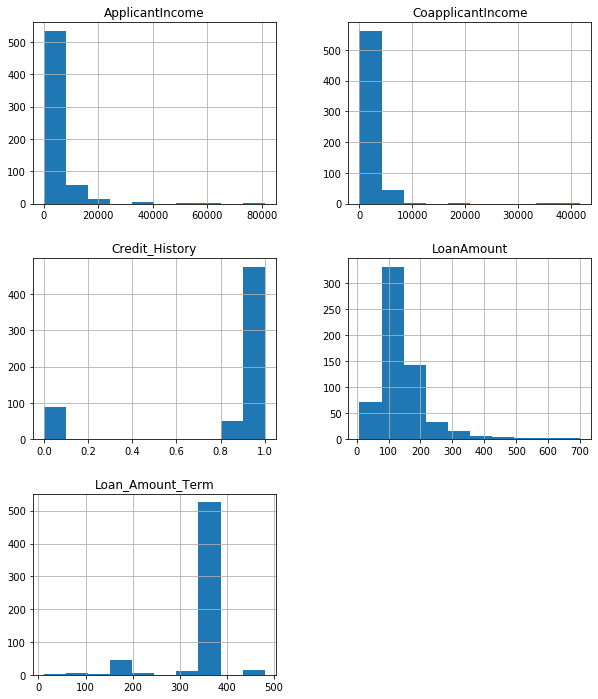

In [24]:
# Let's do some plotting to know how the data columns are distributed in the  dataset¶
# univariate data analysis by graphical representation
# let's plot histplot to check all feature in the dataset whether normal distribution or not

Loan.hist(figsize=(10,12))
plt.show()

# according to below graphs we say that ApplicantIncome,CoapplicantIncome,and Loan Amount is highly Skewed 

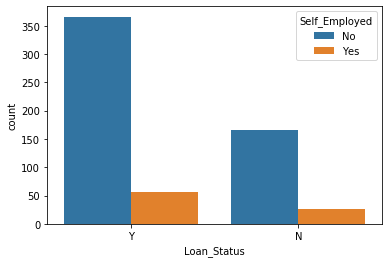

In [25]:
#lets check the count of loan status considering with "Self_Employed"

sns.countplot(x="Loan_Status",hue="Self_Employed",data=Loan)
plt.show()

# from the below graph we say that wether loan were approved their self_employed applicant ratio is low 

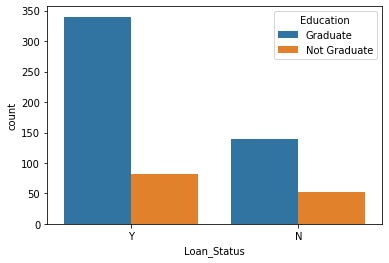

In [26]:
# Lets check the count of Loan_status  based on Education Feature

sns.countplot(x="Loan_Status",hue="Education",data=Loan)
plt.show()

#people who are graduated they were getting loans more than who are not

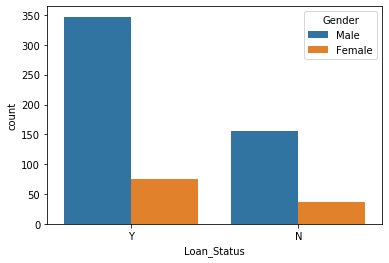

In [27]:
# let's plot count of Loan  against Gender feature.

sns.countplot(x="Loan_Status",hue="Gender",data=Loan)
plt.show()

# as per the below graph,there are more number of males applying for the loans comapred to female

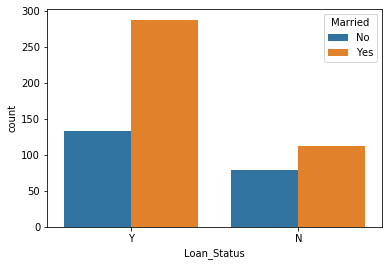

In [28]:
# Lets chcek the count of Loan based on maritalstatus

sns.countplot(x='Loan_Status',hue='Married',data=Loan)
plt.show()

#base on below graph we can say that proportion of applicant getting loans are high when they are married as compare to single

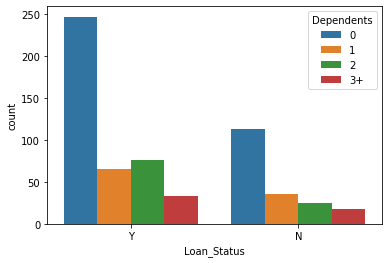

In [29]:
# Lets chcek the count of Loan Status based on Dependents

sns.countplot(x='Loan_Status',hue='Dependents',data=Loan)
plt.show()

# as per below graph we say that the applicant who getting loans high they has less than 3 dependents  

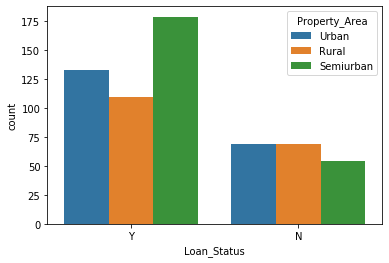

In [30]:
#lets chcek count of loan status based on property area

sns.countplot(x='Loan_Status',hue="Property_Area",data=Loan)
plt.show()

# from the below boxplot we can that there are higher number of applicant from semiurban who are getting loan aproved 
#vas compare  urban

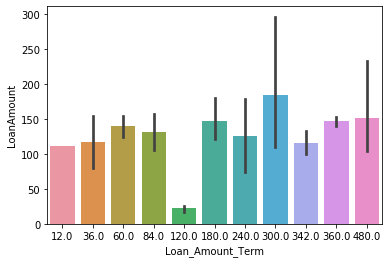

In [31]:
#let's check  loan amount request against  Loan_Amount_Term

sns.barplot(x="Loan_Amount_Term",y="LoanAmount",data=Loan)

# the Loan_Amounts request are high whether loan _Amount Term is 300

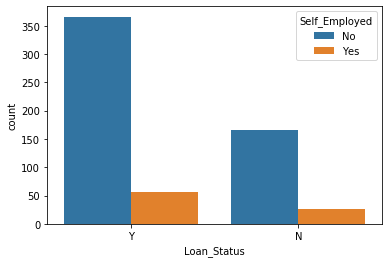

In [32]:
#Lets check count of loan _status aginst applicant who selfEmployed or not

sns.countplot(x="Loan_Status",hue='Self_Employed',data=Loan)
plt.show()

#there are more than double who got loan but in this  self Employes people  ratio is less

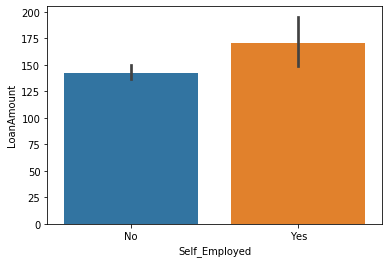

In [33]:
#let's plot barplot of Loan_status against ApplicantIncome

sns.barplot(x="Self_Employed",y="LoanAmount",data=Loan)
plt.show()

# we can see that loan amount request is high whether apllicants are Self_Employed

In [34]:
# let's check credit history against loan_status

pd.crosstab(Loan['Credit_History'],Loan['Loan_Status'],margins=True)

# whether credit history is 1.0 there people got loans high as compare to 0.84 credit history

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
0.8421985815602837,13,37,50
1.0,97,378,475
All,192,422,614


In [35]:
# let's convert all our categorical varibles into numeric by encoding the categories
# we using labelEncoder for that
# first we creat list of all categories variables

cat =['Gender','Married','Dependents','Education', 'Self_Employed','Loan_Status','Property_Area']
for col in cat:
        label = LabelEncoder()
        Loan[col] = label.fit_transform(Loan[col].astype('str'))

In [36]:
# as we see all categorical varible convert in to numeric
Loan.dtypes 

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [37]:
# let's check dataset again
Loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [38]:
# get correlation of each feature in the dataset
data= Loan.corr()
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,0.012819,0.005852,-0.037392,-0.077936,-0.002260,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


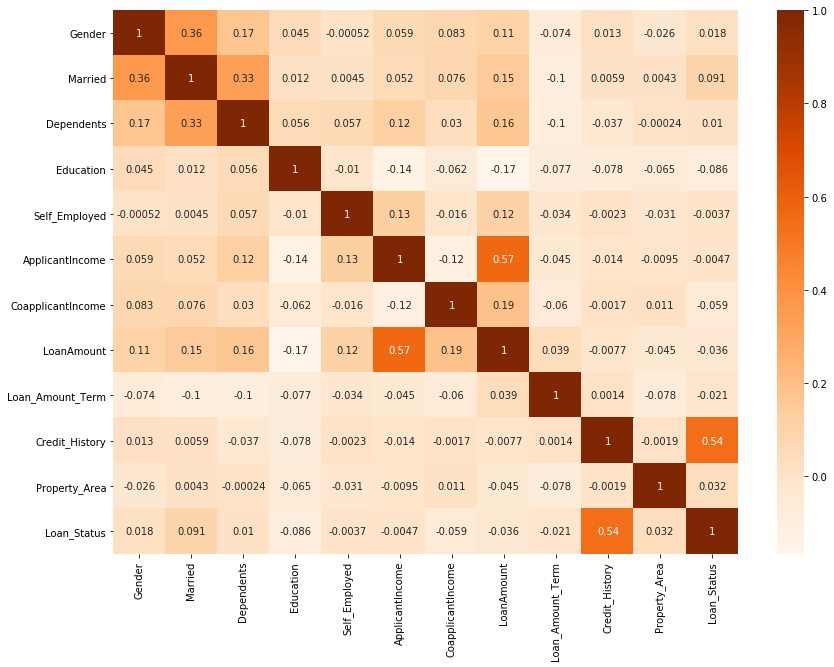

In [39]:
# visualize correlation matrix using heatmap

plt.figure(figsize=(14,10))
sns.heatmap(data,cmap='Oranges',annot=True) 

# observation :-
- dark shades are highly correlated with each other
- Credit is highly positive correlated with Loan_status with 0.54 followed by marrital satus
- Loan status is highly negative correlated with Education followed 
- married feature highly correlated with gender and dependents feature in loan dataset
- Applicant income highly correlated with Loan_Amount

In [40]:
#we can delete loan id as it has no use in prediction

Loan.drop(columns=["Loan_ID"],inplace=True)

In [41]:
# lets remove outliers from loan dataset
# let's check and remove outliers in the dataset using z_score method
from scipy.stats import zscore

z_score=abs(zscore(Loan))
print(Loan.shape)
Loan=Loan.loc[(z_score<3).all(axis=1)]
print(Loan.shape)

# we can see that 577 rows and 12 columns presents in dataset

(614, 12)
(577, 12)


In [42]:
#Now seperate the dataset as input variable and output variabes

x = Loan.drop('Loan_Status', axis = 1)
y = Loan['Loan_Status']

In [43]:
# let's treat skewness of dataset 

for feature in x.columns:
    if x.skew().loc[feature]>0.5:
        x[feature]=np.log1p(x[feature])
    

In [44]:
# let's see whether skewness remove or not

x.skew()

# from the below datas we say that skewness is remove from dataset

Gender              -1.622920
Married             -0.630211
Dependents           0.712539
Education            1.306588
Self_Employed        2.252848
ApplicantIncome     -0.204913
CoapplicantIncome   -0.216757
LoanAmount          -0.697883
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
dtype: float64

In [45]:
# let's check shape x and y
print(x.shape)
print(y.shape)

(577, 11)
(577,)


In [46]:
# Applying Standard scaling to get optimized result

#Lets bring features to common scale

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)


In [47]:
x

array([[ 0.47713685, -1.36251079, -0.77514304, ...,  0.23940793,
         0.45646138,  1.22747207],
       [ 0.47713685,  0.73393914,  0.57375944, ...,  0.23940793,
         0.45646138, -1.30652215],
       [ 0.47713685,  0.73393914, -0.77514304, ...,  0.23940793,
         0.45646138,  1.22747207],
       ...,
       [ 0.47713685,  0.73393914,  0.57375944, ...,  0.23940793,
         0.45646138,  1.22747207],
       [ 0.47713685,  0.73393914,  1.36281681, ...,  0.23940793,
         0.45646138,  1.22747207],
       [-2.09583477, -1.36251079, -0.77514304, ...,  0.23940793,
        -2.37248823, -0.03952504]])

In [48]:
# Train and Test splitting of data 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.22, random_state = 42)

In [49]:
print(x_train.shape)
print(y_train.shape)

(450, 11)
(450,)


In [50]:
print(x_test.shape)
print(y_test.shape)

(127, 11)
(127,)


# Our training and testing data is ready now to perform machine learning algorithm¶

## the Loan approval prediction is a classification problem , so we can use Multiple classification algorithm with hyperparameter tune.

- first we use Logistic regression model because the target variable hold binary classification (0 and 1) to check  accuracy      score level.
- we also used different classification model to check and compare whether we get high accuracy score or not, this exercise       help us to select best model.

##  We will use the following algorithms

- Logistic Regression
- knn
- DecisionTrees
- Random Forests
- SVM
- naviebyes


In [51]:
# let's make function to run multiple algorithm
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

def max_accuracyscore(mod,x,y):
    max_accuracy_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.22, random_state = r_state)  
        mod.fit(x_train,y_train)
        y_pred = mod.predict(x_test)
        a_score=accuracy_score(y_test,y_pred)
        if a_score>max_accuracy_score:
            max_accuracy_score=a_score
            final_r_state=r_state
    print("max Accuracy_Score corresponding to ",final_r_state," is ",max_accuracy_score)
    return final_r_state

In [52]:
#Lets use logistic regression and check
#from sklearn.linear_model import LogisticRegression

lg_mod=LogisticRegression()
max_accuracyscore(lg_mod,x,y)

max Accuracy_Score corresponding to  84  is  0.889763779527559


84

In [53]:
# Lets use cross validation metod to get cross val score because target varible is imbalanced

from sklearn.model_selection import cross_val_score

print("Mean accuracy score for Logistic Regression: ",cross_val_score(lg_mod,x,y,cv=5,scoring="accuracy").mean())
print("standard deviation in accuracy score for Logistic Regression: ",cross_val_score(lg_mod,x,y,cv=5,scoring="accuracy").std())
print('\n')
print('cross val accuracy score:',cross_val_score(lg_mod,x,y,cv=5,scoring="accuracy"))

Mean accuracy score for Logistic Regression:  0.8180809595202397
standard deviation in accuracy score for Logistic Regression:  0.02649724741088433


cross val accuracy score: [0.81034483 0.79310345 0.79130435 0.86086957 0.83478261]


In [54]:
#For KNN we need to know the best value of k using grid search

from sklearn.model_selection import GridSearchCV

kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
Gvs = GridSearchCV(kc, neighbors, cv=5,scoring="accuracy")
Gvs.fit(x,y)
Gvs.best_params_

{'n_neighbors': 15}

In [58]:
kc=KNeighborsClassifier(n_neighbors=15)
max_accuracyscore(kc,x,y)

max Accuracy_Score corresponding to  84  is  0.889763779527559


84

In [59]:
# lets check cross val score and mean accuracy of cross val score
print("Mean accuracy score for KNeighbors: ",cross_val_score(kc,x,y,cv=5,scoring="accuracy").mean())
print("standard deviation in accuracy score for Kneighbors: ",cross_val_score(kc,x,y,cv=5,scoring="accuracy").std())
print('\n')
print('cross val accuracy score:',cross_val_score(kc,x,y,cv=5,scoring="accuracy"))


Mean accuracy score for KNeighbors:  0.8128785607196403
standard deviation in accuracy score for Kneighbors:  0.02628936280362703


cross val accuracy score: [0.80172414 0.79310345 0.7826087  0.85217391 0.83478261]


In [ ]:
#Lets use SVM
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
gv = GridSearchCV(svc, parameters, cv=5,scoring="accuracy")
gv.fit(x,y)
gv.best_params_

In [ ]:
svc=SVC(kernel="linear",C=0.01)
max_accuracyscore(svc,x,y)

In [ ]:
# lets check cross val score and mean accuracy of cross val score
print("Mean accuracy score for SVC: ",cross_val_score(svc,x,y,cv=5,scoring="accuracy").mean())
print("standard deviation in accuracy score for SVC: ",cross_val_score(svc,x,y,cv=5,scoring="accuracy").std())
print('\n')
print('cross val accuracy score:',cross_val_score(svc,x,y,cv=5,scoring="accuracy"))

# logistic regression and svc model gived same cross val score

In [ ]:
#lets use random 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500]}
rf=RandomForestClassifier()
Gcv = GridSearchCV(rf, parameters, cv=5,scoring="accuracy")
Gcv.fit(x,y)
Gcv.best_params_

In [ ]:
rf=RandomForestClassifier(n_estimators=500)
max_accuracyscore(rf,x,y)

In [ ]:
# lets check cross val score and mean accuracy of cross val score
print("Mean accuracy score for RandomForest: ",cross_val_score(rf,x,y,cv=5,scoring="accuracy").mean())
print("standard deviation in accuracy score for RandomForest: ",cross_val_score(rf,x,y,cv=5,scoring="accuracy").std())
print('\n')
print('cross val RandomForest:',cross_val_score(rf,x,y,cv=5,scoring="accuracy"))


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
gb=GradientBoostingClassifier()
gv = GridSearchCV(gb, parameters, cv=5,scoring="accuracy")
gv.fit(x,y)
gv.best_params_

In [ ]:
gb =GradientBoostingClassifier(learning_rate=0.001,n_estimators=500)
max_accuracyscore(gb,x,y)

In [ ]:
#lets check cross_val_score for gradient boosting
print("Mean accuracy for gradient boosting classifier: ",cross_val_score(gb,x,y,cv=5,scoring="accuracy").mean())
print("standard deviation accuracy for gradient boosting classifier: ",cross_val_score(gb,x,y,cv=5,scoring="accuracy").std())
print(cross_val_score(gb,x,y,cv=5,scoring="accuracy"))

# I used multiple algorithms to  get highest accuracy score corresponding to random state

- we seen till now Logistic regression is best model as comparision to other model which are apply in this  because we got max   accuracy score is 81% at random state 84

- So we save model Logistic Regression for production.


In [60]:
# let's create final model
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state =84,test_size=0.22)
lg_mod=LogisticRegression()
lg_mod.fit(x_train,y_train)
y_pred=lg_mod.predict(x_test)
a_score=accuracy_score(y_test,y_pred)
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))

Confusion matrix 
 [[15 14]
 [ 0 98]]
classification report 
               precision    recall  f1-score   support

           0       1.00      0.52      0.68        29
           1       0.88      1.00      0.93        98

    accuracy                           0.89       127
   macro avg       0.94      0.76      0.81       127
weighted avg       0.90      0.89      0.88       127



In [61]:
print("Mean accuracy score for Logistic Regression: ",cross_val_score(lg_mod,x,y,cv=5,scoring="accuracy").mean())
print("standard deviation in accuracy score for Logistic Regression: ",cross_val_score(lg_mod,x,y,cv=5,scoring="accuracy").std())
print('\n')
print('cross val accuracy score:',cross_val_score(lg_mod,x,y,cv=5,scoring="accuracy"))

Mean accuracy score for Logistic Regression:  0.8180809595202397
standard deviation in accuracy score for Logistic Regression:  0.02649724741088433


cross val accuracy score: [0.81034483 0.79310345 0.79130435 0.86086957 0.83478261]


In [62]:
# let's draw roc_auc_curve for Logistic regression model because it is our final model 

from sklearn.metrics import roc_curve,roc_auc_score

y_pred_prob=lg_mod.predict_proba(x_test)[:,1]

#predict_proba function will take test data and try to predict internaly the higher level of queue of given test data

In [63]:
fpr,tpr,treshold = roc_curve(y_test,y_pred_prob) # text actual with predicted probality y

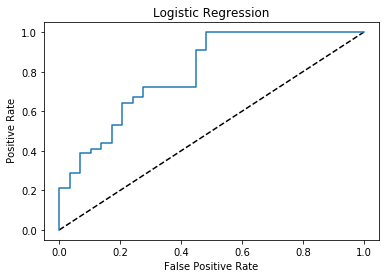

In [64]:
y_pred_prob=lg_mod.predict_proba(x_test)[:,1]
fpr,tpr,treshold = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel(' Positive Rate')
plt.title('Logistic Regression')
plt.show()

In [65]:
auc_score= roc_auc_score(y_test,lg_mod.predict(x_test))
auc_score

0.7586206896551724

In [66]:
from sklearn.externals import joblib
# save the model as a pickle in a file
joblib.dump(lg_mod,'Loan_Approval.pkl')

['Loan_Approval.pkl']